In [4]:
import geopandas as gpd
import pandas as pd
import rasterio
import rasterstats as rs
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sys.path.insert(0, '/home/cparr/masters/snow_terrain_tiles/')
from dem_utils import recursive_rastersstats_to_dict

In [21]:
# Function to compute zonal raster statistics using rasterstats library
# for single shapefile and many rasters inside a single directory
# Returns geodataframe

def compute_drift_statistics(regx, swath_wildcard, shp):
    d = recursive_rastersstats_to_dict(regx, swath_wildcard)
    geodf = gpd.read_file(shp)
    stats=['mean', 'std', 'median', 'sum']

    for k in d.keys():

        col_name = str(d[k]['year'][0])

        zonal_d = (rs.zonal_stats(geodf, k,
                                 stats=stats))
        geodf[col_name] = zonal_d
        
        for st in stats:
    
            st_series = geodf[col_name].apply(lambda x: x.get(st))
            yr_st_name = col_name + '_' + st
            geodf[yr_st_name] = st_series

        del geodf[col_name]
        
    return geodf
    

# def compute_drift_statistics(regx, shp):
#     d = recursive_rastersstats_to_dict(regx, '*_corrected*')
#     geodf = gpd.read_file(shp)
#     stats=['mean', 'std', 'median', 'sum']

#     for k in d.keys():

#         col_name = str(d[k]['year'][0])

#         zonal_d = (rs.zonal_stats(geodf, k,
#                                  stats=stats))
#         geodf[col_name] = zonal_d
        
#         for st in stats:
    
#             st_series = geodf[col_name].apply(lambda x: x.get(st))
#             yr_st_name = col_name + '_' + st
#             geodf[yr_st_name] = st_series

#         del geodf[col_name]
        
#     return geodf
    

In [24]:
# compute stats with our function. combine hv and clpx results
hv = compute_drift_statistics('../../snow_depth_maps/', '*hv*', '../gis/hv_drifts.shp')
clpx = compute_drift_statistics('../../snow_depth_maps/', '*clpx*', '../gis/clpx_drifts.shp')
geodf = pd.concat([hv, clpx], sort=False)
print(len(hv) + len(clpx) == len(geodf))
geodf

/home/cparr/miniconda3/envs/geo/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/cparr/miniconda3/envs/geo/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/cparr/miniconda3/envs/geo/lib/python3.7/site-packages/scipy/stats/stats.py:1121: RuntimeWarning: invalid value encountered in true_divide
  lambda m2, m3: m3 / m2**1.5,
/home/cparr/masters/snow_terrain_tiles/dem_utils.py:154: RuntimeWarning: invalid value encountered in float_scalars
  rstr_dict[f]['CV'] = rstr_dict[f]['sigma'] / rstr_dict[f]['mu']


True


,area,drift_type,study_area,geometry,2013_mean,2013_std,2013_median,2013_sum,2015_mean,2015_std,...,2017_median,2017_sum,2016_mean,2016_std,2016_median,2016_sum,2018_mean,2018_std,2018_median,2018_sum
0,23652.0,watertrack,hv,"POLYGON ((422055.6457072107 7669439.673727455,...",NaN,NaN,NaN,NaN,0.962840,0.161792,...,0.827655,18942.101562,0.461636,0.210598,0.485428,9735.912109,0.878462,0.185468,0.887880,20770.347656
1,9076.0,watertrack,hv,"POLYGON ((422104.286764578 7668973.692397878, ...",NaN,NaN,NaN,NaN,0.978903,0.176965,...,0.693622,6503.658691,0.712417,0.180201,0.688629,6455.918457,0.700524,0.240640,0.687334,6348.148438
2,27821.0,watertrack,hv,"POLYGON ((422187.0306077214 7668980.258940624,...",1.126293,0.481834,1.148009,24113.927734,1.167662,0.367284,...,1.202258,32267.800781,0.782882,0.262002,0.768463,21789.167969,1.263291,0.548228,1.275316,35159.906250
3,4335.0,watertrack,hv,"POLYGON ((422470.8908539571 7669178.277098515,...",0.889603,0.343416,0.820204,3900.020508,1.113198,0.282996,...,0.826938,4011.532715,0.720714,0.240967,0.702759,3159.610352,0.863176,0.355596,0.768892,3784.163330
4,43811.0,watertrack,hv,"POLYGON ((422780.8838725558 7668797.368564924,...",0.844410,0.355613,0.728942,36969.976562,1.077730,0.314788,...,0.824023,41210.894531,0.737652,0.219752,0.687897,32295.859375,1.086385,0.435140,0.969912,47564.101562
5,7801.0,watertrack,hv,"POLYGON ((422895.8929504197 7668930.969335829,...",0.952798,0.428689,0.821746,7415.626465,1.049458,0.351412,...,0.829578,7321.562012,0.833791,0.339346,0.718201,6489.392578,0.833378,0.387913,0.694963,6486.177734
6,22717.0,watertrack,hv,"POLYGON ((423025.8186192095 7668913.242372699,...",0.894896,0.326418,0.817534,20295.337891,1.053832,0.264132,...,0.792987,19424.269531,0.771780,0.214841,0.721588,17503.208984,0.865852,0.339798,0.803301,19636.648438
7,25235.0,watertrack,hv,"POLYGON ((422965.2875255969 7669746.625822257,...",0.835769,0.296043,0.770873,21068.052734,0.936205,0.240599,...,0.697757,18829.001953,0.744757,0.205644,0.694641,18773.826172,0.754140,0.306433,0.685442,19010.357422
8,16329.0,watertrack,hv,"POLYGON ((423255.8367749372 7669037.114932129,...",0.937462,0.336869,0.845885,15301.250000,1.109105,0.311619,...,0.828677,14946.364258,0.856783,0.265807,0.783981,13984.411133,0.945638,0.368991,0.850634,15434.699219
9,8379.0,watertrack,hv,"POLYGON ((423208.3847211944 7669390.357099853,...",0.861510,0.187812,0.838179,7200.501953,1.057113,0.181752,...,0.822833,7147.043457,0.792203,0.165568,0.766632,6621.231934,0.906155,0.217437,0.873674,7573.642090


In [25]:
# Lots of NoData from 2012/2013 lidar acquisitions

geodf_15on = geodf.dropna(axis=1)
geodf_15on

,drift_type,study_area,geometry,2015_mean,2015_std,2015_median,2015_sum,2017_mean,2017_std,2017_median,2017_sum,2016_mean,2016_std,2016_median,2016_sum,2018_mean,2018_std,2018_median,2018_sum
0,watertrack,hv,"POLYGON ((422055.6457072107 7669439.673727455,...",0.962840,0.161792,0.966041,22765.400391,0.801138,0.129067,0.827655,18942.101562,0.461636,0.210598,0.485428,9735.912109,0.878462,0.185468,0.887880,20770.347656
1,watertrack,hv,"POLYGON ((422104.286764578 7668973.692397878, ...",0.978903,0.176965,0.952110,8870.822266,0.717685,0.215162,0.693622,6503.658691,0.712417,0.180201,0.688629,6455.918457,0.700524,0.240640,0.687334,6348.148438
2,watertrack,hv,"POLYGON ((422187.0306077214 7668980.258940624,...",1.167662,0.367284,1.177925,32498.378906,1.159378,0.481420,1.202258,32267.800781,0.782882,0.262002,0.768463,21789.167969,1.263291,0.548228,1.275316,35159.906250
3,watertrack,hv,"POLYGON ((422470.8908539571 7669178.277098515,...",1.113198,0.282996,1.033211,4880.262207,0.915039,0.353462,0.826938,4011.532715,0.720714,0.240967,0.702759,3159.610352,0.863176,0.355596,0.768892,3784.163330
4,watertrack,hv,"POLYGON ((422780.8838725558 7668797.368564924,...",1.077730,0.314788,0.983284,47185.167969,0.941275,0.363211,0.824023,41210.894531,0.737652,0.219752,0.687897,32295.859375,1.086385,0.435140,0.969912,47564.101562
5,watertrack,hv,"POLYGON ((422895.8929504197 7668930.969335829,...",1.049458,0.351412,0.934120,8167.929688,0.940712,0.388131,0.829578,7321.562012,0.833791,0.339346,0.718201,6489.392578,0.833378,0.387913,0.694963,6486.177734
6,watertrack,hv,"POLYGON ((423025.8186192095 7668913.242372699,...",1.053832,0.264132,0.982551,23899.863281,0.856487,0.308762,0.792987,19424.269531,0.771780,0.214841,0.721588,17503.208984,0.865852,0.339798,0.803301,19636.648438
7,watertrack,hv,"POLYGON ((422965.2875255969 7669746.625822257,...",0.936205,0.240599,0.879112,23599.847656,0.746945,0.277642,0.697757,18829.001953,0.744757,0.205644,0.694641,18773.826172,0.754140,0.306433,0.685442,19010.357422
8,watertrack,hv,"POLYGON ((423255.8367749372 7669037.114932129,...",1.109105,0.311619,1.020897,18102.818359,0.915719,0.322465,0.828677,14946.364258,0.856783,0.265807,0.783981,13984.411133,0.945638,0.368991,0.850634,15434.699219
9,watertrack,hv,"POLYGON ((423208.3847211944 7669390.357099853,...",1.057113,0.181752,1.028007,8835.346680,0.855114,0.203831,0.822833,7147.043457,0.792203,0.165568,0.766632,6621.231934,0.906155,0.217437,0.873674,7573.642090


In [26]:
# Get time series averages (e.g. mean of means)
all_means = geodf_15on.filter(regex='mean', axis=1)
all_std = geodf_15on.filter(regex='std', axis=1)
all_volumes = geodf_15on.filter(regex='sum', axis=1)
all_meds = geodf_15on.filter(regex='median', axis=1)

ts_mean = all_means.mean(axis=1)
ts_std = all_std.mean(axis=1)
ts_vol = all_volumes.mean(axis=1)
ts_med = all_meds.mean(axis=1)

summary_df = pd.DataFrame()
summary_df['Drift Type'] = geodf_15on.drift_type
summary_df['Study Area'] = [s.upper() for s in geodf_15on.study_area]
summary_df['Drift Area [m^2]'] = geodf_15on.area

summary_df['Mean Drift Depth [m]'] = ts_mean
summary_df['Mean Drift Volume [m^3]'] = ts_vol
summary_df['Std. Drift Depth [m]'] = ts_std
summary_df['Median Drift Depth [m]'] = ts_med

summary_df['CV Drift Depth'] = ts_std / ts_mean
summary_df['Volume:Area Ratio'] = ts_vol / summary_df['Drift Area [m^2]']

summary_df.head(3)

,Drift Type,Study Area,Drift Area [m^2],Mean Drift Depth [m],Mean Drift Volume [m^3],Std. Drift Depth [m],Median Drift Depth [m],CV Drift Depth,Volume:Area Ratio
0,watertrack,HV,23636.367493,0.776019,18053.440430,0.171731,0.791751,0.221298,0.763799
1,watertrack,HV,9069.760465,0.777382,7044.636963,0.203242,0.755424,0.261444,0.776717
2,watertrack,HV,27802.663732,1.093303,30428.813477,0.414733,1.105991,0.379340,1.094457


In [108]:
tableoutput = summary_df.copy()
del tableoutput['Median Drift Depth [m]']
tableoutput.columns = ['Class','Swath', 'Drift Area $m^2$',
                      'Mean Depth $m$', 'Drift Volume $m^3$',
                      'Std. Depth $m$', 'CV Depth',
                      'NDV $m$']

tableoutput.replace('watertrack', 'water track (f)', inplace=True)
tableoutput.replace('polygon', 'ice wedge (f)', inplace=True)
tableoutput.replace('stream', 'stream (nf)', inplace=True)
tableoutput.replace('lake', 'lake (nf)', inplace=True)
tableoutput.replace('outcrop', 'outcrop (nf)', inplace=True)

tableoutput['Drift Area $m^2$'] = tableoutput['Drift Area $m^2$'].astype(int)
tableoutput['Drift Volume $m^3$'] = tableoutput['Drift Volume $m^3$'].astype(int)

table4 = tableoutput.groupby(['Swath','Class']).mean()

table4

Drift Area $m^2$  Mean Depth $m$  Drift Volume $m^3$  \
Swath Class                                                                   
CLPX  ice wedge (f)          369.600000        0.889683          350.200000   
      lake (nf)            23832.250000        1.106571        26790.500000   
      other               212890.000000        0.869638       186951.500000   
      outcrop (nf)          5431.800000        1.320418         7522.800000   
      stream (nf)          20247.250000        1.292948        25458.250000   
      water track (f)       2287.727273        0.865197         2056.000000   
HV    ice wedge (f)          850.285714        0.840436          720.142857   
      lake (nf)            71678.666667        1.306417        93953.000000   
      other                12722.000000        0.981453        11357.500000   
      stream (nf)           2182.000000        1.096035         2420.333333   
      water track (f)      20967.636364        0.925427        20216.909091   

                       Std. Depth $m$  CV Depth   NDV $m$  
Swath Class                                                
CLPX  ice wedge (f)          0.108080  0.119734  0.901972  
      lake (nf)              0.246943  0.221708  1.107087  
      other                  0.128709  0.147995  0.869662  
      outcrop (nf)           0.352020  0.258594  1.322274  
      stream (nf)            0.316446  0.246254  1.292377  
      water track (f)        0.097707  0.111459  0.864205  
HV    ice wedge (f)          0.096246  0.114451  0.845680  
      lake (nf)              0.300889  0.230033  1.306681  
      other                  0.191457  0.192539  0.982561  
      stream (nf)            0.289626  0.261189  1.097643  
      water track (f)        0.283517  0.305597  0.923877

In [125]:
tableoutput

,Class,Swath,Drift Area $m^2$,Mean Depth $m$,Drift Volume $m^3$,Std. Depth $m$,CV Depth,NDV $m$
0,water track (f),HV,23636,0.776019,18053,0.171731,0.221298,0.763799
1,water track (f),HV,9069,0.777382,7044,0.203242,0.261444,0.776717
2,water track (f),HV,27802,1.093303,30428,0.414733,0.379340,1.094457
3,water track (f),HV,4386,0.903032,3958,0.308255,0.341356,0.902419
4,water track (f),HV,43782,0.960760,42064,0.333223,0.346832,0.960753
5,water track (f),HV,7795,0.914335,7116,0.366700,0.401057,0.912828
6,water track (f),HV,22701,0.886988,20115,0.281883,0.317798,0.886101
7,water track (f),HV,25218,0.795512,20053,0.257579,0.323791,0.795176
8,water track (f),HV,16317,0.956811,15617,0.317220,0.331539,0.957052
9,water track (f),HV,8373,0.902646,7544,0.192147,0.212871,0.900932


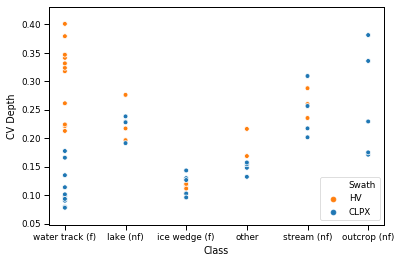

In [109]:
sns.set_context('paper')

current_palette = sns.color_palette()[0:2][::-1]

ax = sns.scatterplot(x="Class", y="CV Depth", hue='Swath', data=tableoutput,
                    palette = current_palette)

plt.savefig('../../thesis_text/figs/pngs/drift_type_x_cv_depth_y.png',
            dpi=200, bbox_inches='tight')

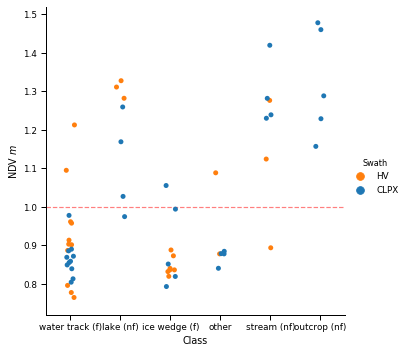

In [110]:
sns.catplot(x="Class", y="NDV $m$", hue='Swath',
            data=tableoutput, palette=current_palette)
plt.axhline(y=1, c='r', ls='--', alpha=0.5)
plt.savefig('../../thesis_text/figs/pngs/drift_type_x_volume_area_ratio_y.png',
            dpi=200, bbox_inches='tight')

In [123]:
table4['Drift Area $m^2$'] = table4['Drift Area $m^2$'].astype(int)
table4['Drift Volume $m^3$'] = table4['Drift Volume $m^3$'].astype(int)

table4 = table4.sort_values('Class').round(2)
table4.to_csv('../../thesis_text/figs/fig_tabular_data/table4_drift_class_pretty.csv')

# row for HV outcrop where all values are 'N/A' is added later

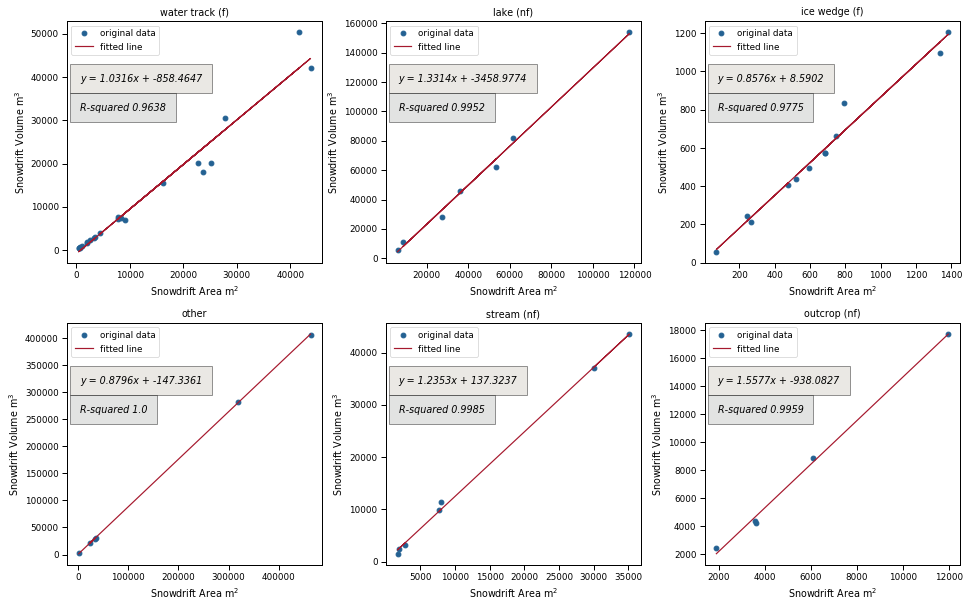

In [130]:
d = {}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10))
j = 0

for i in tableoutput['Class'].unique():

    d[i] = {}
    driftclass = tableoutput[tableoutput['Class']==i]
    x = driftclass["Drift Area $m^2$"]
    y = driftclass["Drift Volume $m^3$"]
    d[i]['x'] = x
    d[i]['y'] = y
    
    gradient,intercept,r_value,p_value,std_err=stats.linregress(x,y)
    d[i]['Gradient'] = gradient.round(4)
    d[i]['Intercept'] = intercept.round(4)
    d[i]['R Value'] = r_value.round(5)
    d[i]['P Value'] = p_value.round(5)
    d[i]['Std. Error'] = std_err.round(4)
    
    if j <= 2:
        ax = axes[0, j]
    else:
        ax = axes[1, j - 3]
        
    ax.plot(x, y, 'o', c='#236192', label='original data')
    ax.plot(x, intercept + gradient * x, '#A6192E', label='fitted line')
    ax.set_ylabel("Snowdrift Volume m$^3$")
    ax.set_xlabel("Snowdrift Area m$^2$")
    ax.set_title(i)
    ax.legend()
    
    txtstr = "y = " + str(d[i]['Gradient']) + 'x + ' + str(d[i]['Intercept'])
    ax.text(0.05, 0.75, txtstr, style='italic',
            transform=ax.transAxes,
            bbox={'facecolor':'#D7D2CB', 'alpha':0.5, 'pad':10})
    
    rvstr = "R-squared " + str(np.round(d[i]['R Value'] ** 2, 4))

    ax.text(0.05, 0.63, rvstr, style='italic',
        transform=ax.transAxes,
        bbox={'facecolor':'#C7C9C7', 'alpha':0.5, 'pad':10})

    j+=1
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.savefig('../../thesis_text/figs/pngs/snowdrift_class_area_volume_linreg_3x2.png',
            facecolor='#EFDBB2', dpi=200, bbox_inches='tight')


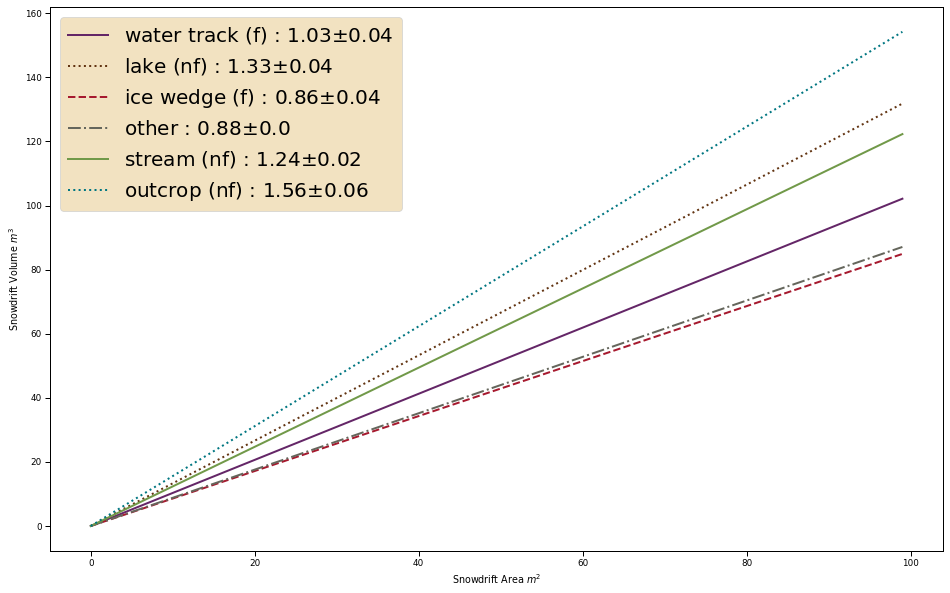

In [150]:
linestyles = ['-', ':', '--', '-.', '-', ':']

plt.figure(figsize=(16,10))

i = 0
for k in d.keys():
    lbl = k + " : " + str(d[k]['Gradient'].round(2)) + '$\pm$' + str(d[k]['Std. Error'].round(2))
    x = np.arange(0,100)
    y = d[k]['Gradient'] * x
    plt.plot(x, y, uaclrs[i], ls=linestyles[i], label=lbl, lw=2)
    i+=1

plt.ylabel("Snowdrift Volume $m^3$")
plt.xlabel("Snowdrift Area $m^2$")
leg = plt.legend(loc=2, prop={'size': 20}, frameon=1)
frame = leg.get_frame()
frame.set_facecolor('#EFDBB2')

plt.savefig('../../thesis_text/figs/pngs/snowdrift_class_area_volume_linreg_all_set_yint0.png',
            dpi=200, bbox_inches='tight')

# slope is predicted mean drift depth aka NDV

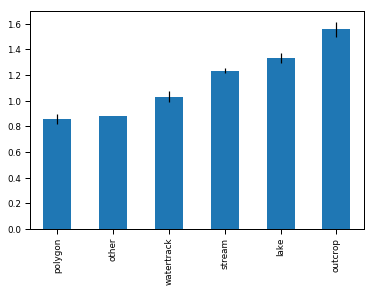

In [260]:
regdf = pd.DataFrame.from_dict(d, orient='index').sort_values('Gradient')
regdf.Gradient.plot.bar(yerr = regdf['Std. Error'])

